In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_longitude   199987 non-null  float64
 2   pickup_latitude    199987 non-null  float64
 3   dropoff_longitude  199987 non-null  float64
 4   dropoff_latitude   199987 non-null  float64
 5   passenger_count    199987 non-null  int64  
 6   hour               199987 non-null  int32  
 7   day                199987 non-null  int32  
 8   month              199987 non-null  int32  
 9   year               199987 non-null  int32  
 10  dayofweek          199987 non-null  int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 14.5 MB


In [4]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  200000 non-null  float64            
 5   dropoff_latitude   200000 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


In [9]:
# creation of new individual cols
df=df.assign(hour=df.pickup_datetime.dt.hour,
            day=df.pickup_datetime.dt.day,
            month=df.pickup_datetime.dt.month,
            year=df.pickup_datetime.dt.year,
            dayofweek=df.pickup_datetime.dt.dayofweek)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [10]:
df.drop('pickup_datetime', axis=1, inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [11]:
# you are filtering a Pandas DataFrame df to exclude rows where the longitude and latitude values
# fall outside the range of -90 to 90.
# This is a common operation when dealing with geographical data to remove outliers or invalid data points.

df = df[(df['pickup_longitude'] >= -90) & (df['pickup_longitude'] <= 90)]
df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]
df = df[(df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]
df = df[(df['dropoff_longitude'] >= -90) & (df['dropoff_longitude'] <= 90)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_longitude   199987 non-null  float64
 2   pickup_latitude    199987 non-null  float64
 3   dropoff_longitude  199987 non-null  float64
 4   dropoff_latitude   199987 non-null  float64
 5   passenger_count    199987 non-null  int64  
 6   hour               199987 non-null  int32  
 7   day                199987 non-null  int32  
 8   month              199987 non-null  int32  
 9   year               199987 non-null  int32  
 10  dayofweek          199987 non-null  int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 14.5 MB


In [12]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers based on the lower and upper bounds
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers]
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151022 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        151022 non-null  float64
 1   pickup_longitude   151022 non-null  float64
 2   pickup_latitude    151022 non-null  float64
 3   dropoff_longitude  151022 non-null  float64
 4   dropoff_latitude   151022 non-null  float64
 5   passenger_count    151022 non-null  int64  
 6   hour               151022 non-null  int32  
 7   day                151022 non-null  int32  
 8   month              151022 non-null  int32  
 9   year               151022 non-null  int32  
 10  dayofweek          151022 non-null  int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 10.9 MB


In [13]:
df_no_outliers.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2,12,2,2011,5


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

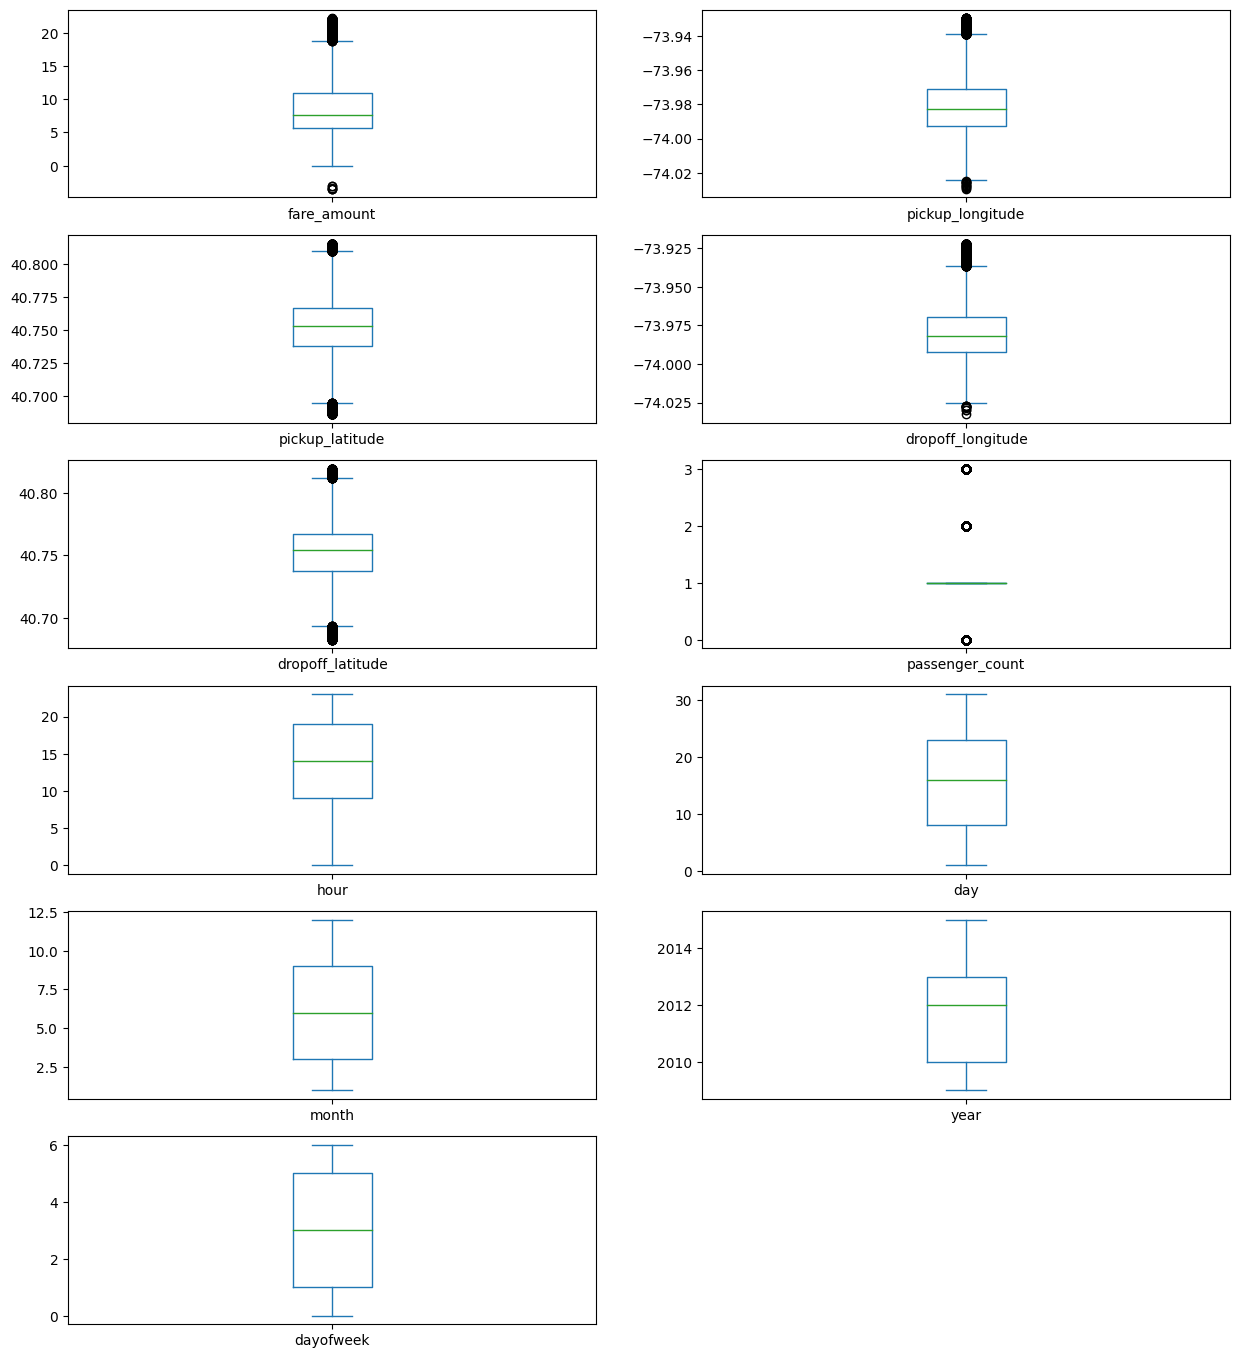

In [14]:
df_no_outliers.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [15]:
# haversine library, which is commonly used for calculating distances
# between geographical coordinates using the Haversine formula.
import haversine as hs
travel_dist=[]
for pos in range(len(df_no_outliers)):
    long1, lati1, long2, lati2 = df_no_outliers['pickup_longitude'].iloc[pos], df_no_outliers['pickup_latitude'].iloc[pos], df_no_outliers['dropoff_longitude'].iloc[pos], df_no_outliers['dropoff_latitude'].iloc[pos]
    loc1 = (long1, lati1)
    loc2 = (long2, lati2)
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)

df_no_outliers['dist_km'] = travel_dist
df_no_outliers.head()

C:\Users\SHRINIKET\AppData\Local\Temp\ipykernel_14684\477756603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['dist_km'] = travel_dist


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,0.465182
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,0.678729
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,4.823528
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.261640
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2,12,2,2011,5,0.000000


In [16]:
# correlation matrix - pairwise correlations between all numerical columns in the DataFrame.
# The values in the correlation matrix range from -1 (perfect negative correlation)
# to 1 (perfect positive correlation), with 0 indicating no correlation.
df_corr=df_no_outliers.corr()

<Axes: >

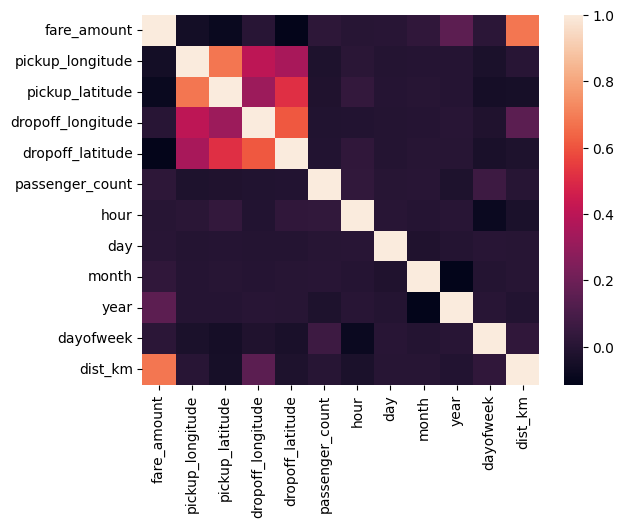

In [17]:
sns.heatmap(data=df_corr)

In [18]:
X=df_no_outliers.drop('fare_amount', axis=1)
y=df_no_outliers['fare_amount']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred=lr.predict(X_test)
lr_r2=r2_score(y_test, y_pred)
lr_mse=mean_squared_error(y_test, y_pred)
lr_rmse=np.sqrt(lr_mse)

In [22]:
lr_r2, lr_mse, lr_rmse

(0.5068376950097626, 7.649444134643633, 2.7657628485905352)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
y_pred=rf.predict(X_test)

# R-squared (R^2) score -  It quantifies how well the model fits the data, with higher values indicating a better fit.
rf_r2=r2_score(y_test, y_pred)

# Lower MSE values indicate better model performance.
rf_mse=mean_squared_error(y_test, y_pred)
rf_rmse=np.sqrt(rf_mse)
#  Lower RMSE values indicate better model performance

In [25]:
rf_r2, rf_mse, rf_rmse

(0.7686188554008332, 3.588954633214037, 1.8944536503208615)